In [1]:
import requests
import matplotlib.pyplot as plt
import re

In [2]:
params = {
	"access_token": "vk1.a.b5YuFY8oIY169Ir2A9eM0OBynqC2soTs-NezwZuHHgSu1hxcIXGfysnFRtxMQenlMuVikSd2tZVg48-VZ9ZD_AJLE62O5YqW4NeP8dDJK0D05owN_Vwkg09FYiqgOPvSO3ZNCUCT8CotGcVZgKCZyAEnv5Y0EpzkKLctafy2Bns3MGYv67Umy-Fe6FReojwS58RYeyHU22TQqQhQQ6PuTA",
	"v": 5.199
}

token = "vk1.a.b5YuFY8oIY169Ir2A9eM0OBynqC2soTs-NezwZuHHgSu1hxcIXGfysnFRtxMQenlMuVikSd2tZVg48-VZ9ZD_AJLE62O5YqW4NeP8dDJK0D05owN_Vwkg09FYiqgOPvSO3ZNCUCT8CotGcVZgKCZyAEnv5Y0EpzkKLctafy2Bns3MGYv67Umy-Fe6FReojwS58RYeyHU22TQqQhQQ6PuTA"

In [3]:
params["owner_id"] = -211232966
params["extended"] = 0

In [4]:
response = requests.get(
	url="https://api.vk.ru/method/video.get",
	params={
		"access_token": token,
		"v": 5.199,
		"owner_id": -211232966,
		"album_id": 15
	}
).json()

In [5]:
d = {}

for i, video in enumerate(response["response"]["items"][::-1]):
	title = video["title"].split(maxsplit=3)[-1]	
	views = video["views"]
	p = r"(?P<name>[а-яА-ЯЁё\s]*)(\.)?(?P<d>\sЧасть\s\d)?\s\|\s(?P<all>[а-яА-ЯЁё\,\.\d\s]*)"
	regex_title = re.search(p, title)
	if regex_title:
		regex_title = regex_title.groupdict()
		guest = regex_title["all"].split(", ", 1)[0]
		if regex_title["name"] == "Новогодний выпуск":
			title = f"{regex_title["name"]} {guest}"
		
		else:
			title = guest
		
		if title not in d:
			d[title] = {
				"count": 1,
				"views": views
			}
		
		else:
			d[title]["count"] += 1
			d[title]["views"] += views

In [6]:
d

{'Шастун': {'count': 1, 'views': 12182714},
 'Складчикова': {'count': 1, 'views': 12374061},
 'Джабраилов': {'count': 1, 'views': 11326441},
 'Щербакова': {'count': 1, 'views': 9820277},
 'Чебатков': {'count': 1, 'views': 17664148},
 'Дорохов': {'count': 1, 'views': 21273173},
 'Журавлев': {'count': 1, 'views': 13260322},
 'Бебуришвили': {'count': 2, 'views': 33105091},
 'Мягкова': {'count': 1, 'views': 17629246},
 'Куруч': {'count': 1, 'views': 15505092},
 'Яровицына': {'count': 1, 'views': 14536905},
 'Кока': {'count': 1, 'views': 22483701},
 'Жидковский': {'count': 1, 'views': 12167757},
 'Новогодний выпуск Шастун': {'count': 1, 'views': 31440361},
 'Позов': {'count': 1, 'views': 26273280},
 'Харламов': {'count': 1, 'views': 26397198},
 'Галич': {'count': 1, 'views': 10597609},
 'Каграманов': {'count': 1, 'views': 30742963},
 'Парфенюк': {'count': 1, 'views': 21003957},
 'Соболев': {'count': 2, 'views': 25321491},
 'Бурунов': {'count': 1, 'views': 22326763},
 'Смирнов': {'count': 1,

In [7]:
for k, v in d.items():
	if v["count"] == 1:
		d[k] = float(f"{v["views"] / 1_000_000:.1f}")
	
	else:
		d[k] = float(f"{(v["views"] // v["count"]) / 1_000_000:.3f}")

In [8]:
d

{'Шастун': 12.2,
 'Складчикова': 12.4,
 'Джабраилов': 11.3,
 'Щербакова': 9.8,
 'Чебатков': 17.7,
 'Дорохов': 21.3,
 'Журавлев': 13.3,
 'Бебуришвили': 16.553,
 'Мягкова': 17.6,
 'Куруч': 15.5,
 'Яровицына': 14.5,
 'Кока': 22.5,
 'Жидковский': 12.2,
 'Новогодний выпуск Шастун': 31.4,
 'Позов': 26.3,
 'Харламов': 26.4,
 'Галич': 10.6,
 'Каграманов': 30.7,
 'Парфенюк': 21.0,
 'Соболев': 12.661,
 'Бурунов': 22.3,
 'Смирнов': 9.5,
 'Федункив': 16.3,
 'Абрамов': 11.8,
 'Тимати': 20.9,
 'Дедищев': 14.8,
 'Матвиенко': 16.1,
 'Дзюба': 20.7,
 'Масленников': 14.1,
 'Валерия': 8.9,
 'Джиган': 13.2,
 'Картозия': 8.1,
 'Карцев': 12.4,
 'Новогодний выпуск Заяц': 15.778,
 'Баста': 17.2,
 'Бустер': 15.7,
 'Мазур': 15.9,
 'Бородина': 14.6,
 'Ахмедова': 15.2,
 'Асти': 16.4,
 'Музыченко': 15.0,
 'Горбачёва': 13.7,
 'Амарян': 13.6,
 'Дмитриенко': 13.4,
 'Шаляпин': 14.8,
 'Бейнарович': 9.9,
 'Серябкина': 10.5,
 'Лапенко': 9.5,
 'Крыжовников': 2.4}

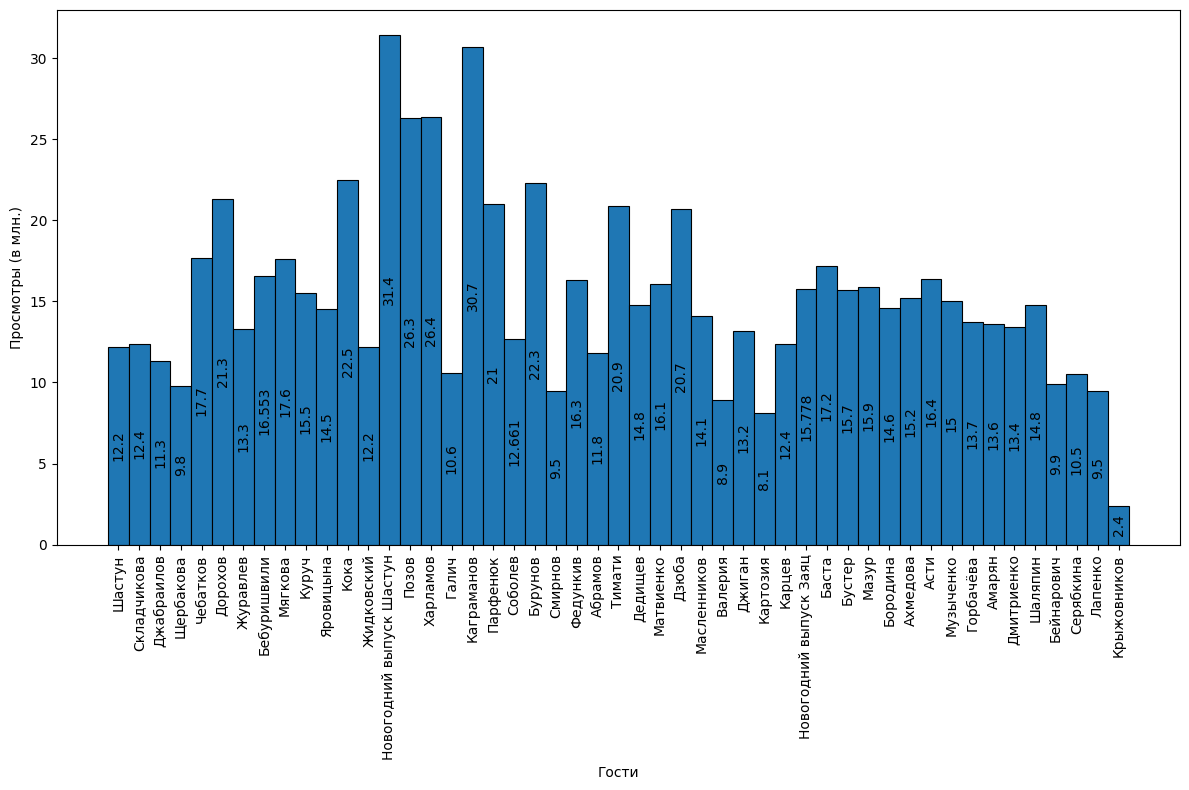

In [9]:
plt.figure(figsize=(12, 8))

bar = plt.bar(d.keys(), d.values(), width=1, ec="black", lw=.8)

plt.xlabel("Гости")
plt.ylabel("Просмотры (в млн.)")

plt.tick_params(axis="x", rotation=90)
plt.bar_label(bar, label_type="center", rotation=90, weight="book")

plt.tight_layout()
plt.show()

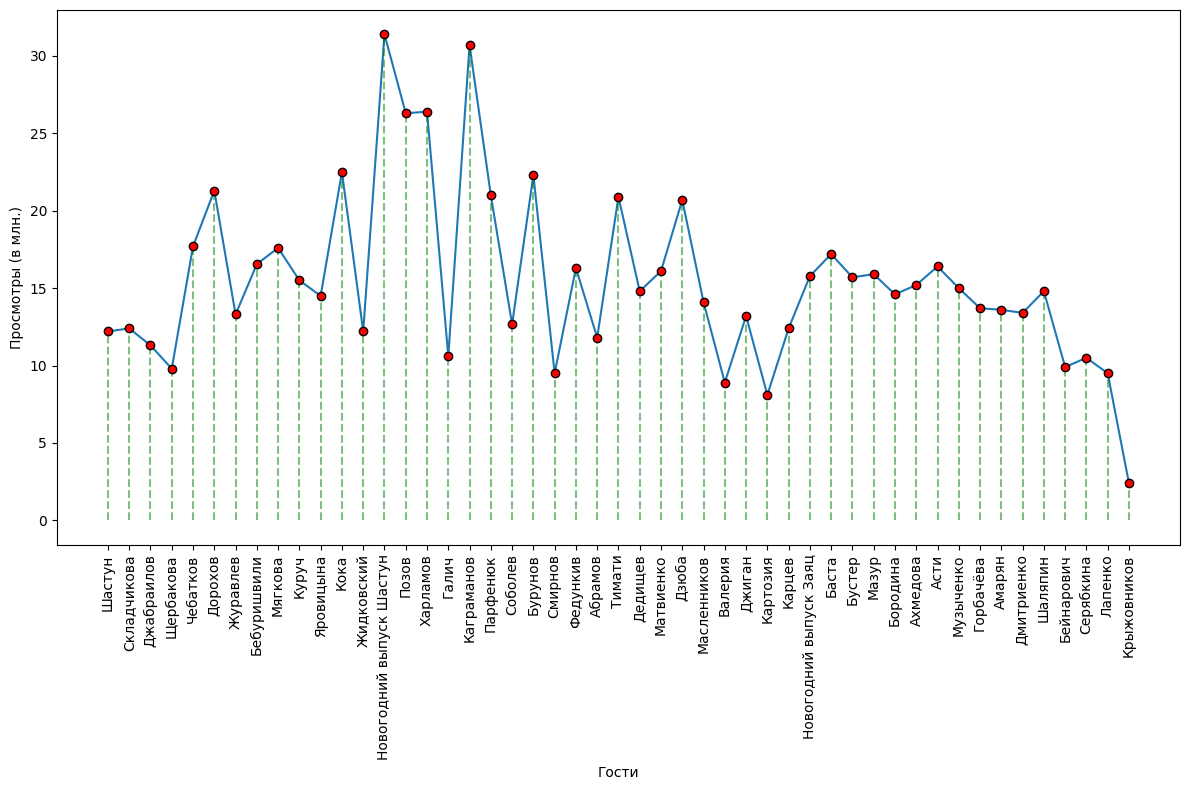

In [10]:
plt.figure(figsize=(12, 8))

plt.plot(d.keys(), d.values())
plt.scatter(d.keys(), d.values(), c="r", ec="black", zorder=3)

for x, y in zip(d.keys(), d.values()):
	plt.vlines(x, 0, y, color="g", alpha=0.5, linestyles="--")
	# plt.hlines(y, 0, x, color="g", alpha=0.3, linestyles="--")

plt.xlabel("Гости")
plt.ylabel("Просмотры (в млн.)")


plt.tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()